In [2]:
import pandas as pd

In [3]:
data_xls = pd.read_excel('amazon_fire_data.csv.xlsx', 'Sheet1', index_col=None)
data_xls.to_csv('amazon.csv', encoding='utf-8')

In [22]:
features=None
label=Nonefeatures=None
label=None

In [23]:
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as pyplot

df = pd.read_csv(r'amazon.csv')
df.head()

,Unnamed: 0,temp,wind,hum,preci,pressure,fire
0,0,34,9,65.0,0.0,1012,1
1,1,36,9,61.0,0.0,1010,1
2,2,34,7,65.0,0.0,1009,1
3,3,37,8,62.0,0.0,1008,1
4,4,31,6,77.0,1.9,1010,1


In [24]:
print(label.shape)

AttributeError: 'NoneType' object has no attribute 'shape'

In [25]:
print(features.shape)

AttributeError: 'NoneType' object has no attribute 'shape'

In [32]:


dataset = df.values          
features = dataset[:,1:6]
label = dataset[:,6]
label=label.reshape(1460,1)
#features=df[["temp","wind","hum","preci","pressure",]]
#label=df[["fire"]]

In [ ]:
from pyspark.sql.functions import when  

df = df.select('colA', 
                   when(df.colB > 0, 1).alias('colB'),
                   when(df.colB > 0, 1).alias('colC'))

In [33]:
type(label)

numpy.ndarray

In [34]:
type(df)

pandas.core.frame.DataFrame

In [35]:
print(label.shape)

(1460, 1)


In [36]:
print(features.shape)

(1460, 5)


In [16]:
label.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [37]:
scalarfeatures, scalarlabel = MinMaxScaler(), MinMaxScaler()
scalarfeatures.fit(features)
scalarlabel.fit(label)
features    =   scalarfeatures.transform(features)
label       =   scalarlabel.transform(label)


In [42]:
print(label.shape)

(1460, 1)


In [33]:
label

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [ ]:
200

In [ ]:
# define the model
model = Sequential()
model.add(Dense(1000,input_dim=5, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compiling the model
model.compile(loss='mse', optimizer='adagrad', metrics=['accuracy'])
m=model.fit(features,label, validation_split=0.2, epochs=200,batch_size=64)
# evaluating the accuracy of the model
_, accuracy = model.evaluate(features,label)
print('Accuracy: %.2f' % (accuracy*100))
# make class predictions with the model
predictions = model.predict_classes(features)


Train on 1168 samples, validate on 292 samples
Epoch 1/200
1168/1168 [==============================] - 1s 677us/step - loss: 0.2480 - accuracy: 0.6079 - val_loss: 0.1905 - val_accuracy: 0.7089
Epoch 2/200
1168/1168 [==============================] - 1s 505us/step - loss: 0.2183 - accuracy: 0.6524 - val_loss: 0.1984 - val_accuracy: 0.6781
Epoch 3/200
1168/1168 [==============================] - 1s 674us/step - loss: 0.2149 - accuracy: 0.6729 - val_loss: 0.1981 - val_accuracy: 0.6747
Epoch 4/200
1168/1168 [==============================] - 1s 524us/step - loss: 0.2131 - accuracy: 0.6610 - val_loss: 0.2123 - val_accuracy: 0.6062
Epoch 5/200
1168/1168 [==============================] - 1s 565us/step - loss: 0.2135 - accuracy: 0.6635 - val_loss: 0.1987 - val_accuracy: 0.6849
Epoch 6/200
1168/1168 [==============================] - 1s 530us/step - loss: 0.2104 - accuracy: 0.6764 - val_loss: 0.2020 - val_accuracy: 0.6644
Epoch 7/200
1168/1168 [==============================] - 1s 518us/step 

1168/1168 [==============================] - 1s 510us/step - loss: 0.1893 - accuracy: 0.7123 - val_loss: 0.2010 - val_accuracy: 0.6678
Epoch 57/200
1168/1168 [==============================] - 1s 500us/step - loss: 0.1897 - accuracy: 0.7123 - val_loss: 0.1948 - val_accuracy: 0.6747
Epoch 58/200
1168/1168 [==============================] - 1s 1ms/step - loss: 0.1892 - accuracy: 0.7166 - val_loss: 0.1791 - val_accuracy: 0.6884
Epoch 59/200
1168/1168 [==============================] - 1s 872us/step - loss: 0.1882 - accuracy: 0.7140 - val_loss: 0.1773 - val_accuracy: 0.7021
Epoch 60/200
1168/1168 [==============================] - 1s 719us/step - loss: 0.1880 - accuracy: 0.7192 - val_loss: 0.1773 - val_accuracy: 0.7055
Epoch 61/200
1168/1168 [==============================] - 2s 2ms/step - loss: 0.1893 - accuracy: 0.7200 - val_loss: 0.1785 - val_accuracy: 0.6918
Epoch 62/200
1168/1168 [==============================] - 1s 630us/step - loss: 0.1888 - accuracy: 0.7158 - val_loss: 0.1800 - va

In [44]:
import matplotlib.pyplot as plt

[0.6842105263157894, 0.25, 0.6674633690117427, 0.0, 0.375] => 0 (expected 1)
[0.7894736842105263, 0.25, 0.6258962901382106, 0.0, 0.25] => 0 (expected 1)
[0.6842105263157894, 0.15000000000000002, 0.6674633690117427, 0.0, 0.1875] => 0 (expected 1)
[0.8421052631578947, 0.2, 0.6362880598565936, 0.0, 0.125] => 0 (expected 1)
[0.5263157894736843, 0.10000000000000003, 0.7921646056323393, 0.05507246376811594, 0.25] => 0 (expected 1)
[0.5789473684210527, 0.10000000000000003, 0.7921646056323393, 0.03768115942028986, 0.3125] => 0 (expected 1)
[0.5263157894736843, 0.25, 0.76098929647719, 0.026086956521739132, 0.3125] => 0 (expected 1)
[0.631578947368421, 0.45, 0.6986386781668918, 0.0, 0.375] => 0 (expected 1)
[0.5263157894736843, 0.4000000000000001, 0.7194222176036579, 0.0, 0.5625] => 1 (expected 1)
[0.5789473684210527, 0.4000000000000001, 0.740205757040424, 0.002898550724637681, 0.625] => 1 (expected 1)
[0.631578947368421, 0.4000000000000001, 0.740205757040424, 0.002898550724637681, 0.5625] => 1 

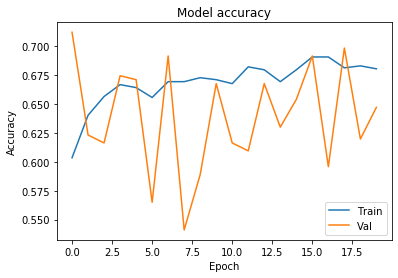

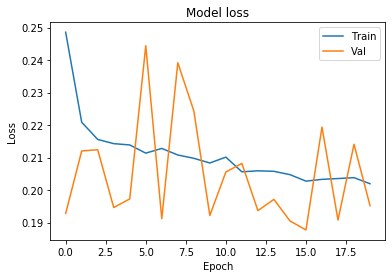

In [46]:
# summarize the first 15 cases
for i in range(15):
	print('%s => %d (expected %d)' % (features[i].tolist(), predictions[i],label[i]))
plt.plot(m.history['accuracy'])
plt.plot(m.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
